<a href="https://colab.research.google.com/github/volpo/PG_YELP_GOOGLE_MAPS/blob/main/Cassandra_SQL_DataPipeline%20/Cassandra_to_csv_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO FINAL HENRY
---
CASSANDRA

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Librerias Requeridas
!pip install cassandra-driver

from cassandra.cluster import Cluster
from cassandra.query import SimpleStatement, dict_factory

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## CONEXIÓN AL CLUSTER
  #El servidor no tiene cintraseña ni usuario para facilidad
cluster = Cluster(['186.87.6.161'], port='9042', protocol_version = 5) #IP del servidor y el puerto estandar de cassandra 9042
session = cluster.connect('henry')
session.row_factory = dict_factory #Transforma la respuesta del cluster a dicionario

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 48.0 MB/s eta 0:00:00


Traceback (most recent call last):
  File "cassandra/cluster.py", line 3541, in cassandra.cluster.ControlConnection._reconnect_internal
  File "cassandra/cluster.py", line 3563, in cassandra.cluster.ControlConnection._try_connect
  File "cassandra/cluster.py", line 1630, in cassandra.cluster.Cluster.connection_factory
  File "cassandra/connection.py", line 859, in cassandra.connection.Connection.factory
cassandra.OperationTimedOut: errors=Timed out creating connection (5 seconds), last_host=None
ERROR:cassandra.cluster:Control connection failed to connect, shutting down Cluster:
Traceback (most recent call last):
  File "cassandra/cluster.py", line 1700, in cassandra.cluster.Cluster.connect
  File "cassandra/cluster.py", line 3507, in cassandra.cluster.ControlConnection.connect
  File "cassandra/cluster.py", line 3552, in cassandra.cluster.ControlConnection._reconnect_internal
cassandra.cluster.NoHostAvailable: ('Unable to connect to any servers', {'186.87.6.161:9042': OperationTimedOu

NoHostAvailable: ignored

### Estructura de la base de datos

Las bases de datos de cassandra se dividen en las siguientes estructuras:

![Estructura Cassandra](https://www.red-gate.com/simple-talk/wp-content/uploads/2019/01/cassandra-cluster-node-l-n-keyspace-1-column-f.png "a title")|

* Keyspace = Database

Para este caso, el servidor se encuentra configurado con un solo nodo y el keyspace se llama 'henry'.

El Keyspace en este momento tiene dos (2) tablas, las cuales se estructuran de la siguiente manera:

* reviews
  * gmap_id: Identificación única del negocio.
  * state: Estado donde se encuentra ubicado el negocio.
  * user_id: Identificación única del usuario que realizó la reseña.
  * name: Nombre del usuario que realizó la reseña.
  * time: Fecha y hora en formato datetime.
  * rating: Calificación del usuario ( 1 a 5) como entero.
  * text: Texto del review realizado por el cliente.
  * resp: Respuesta al comentario del cliente como diccionario en *formato texto*. Incluye "time" como la fecha y hora en la que se repondió al comentario y "text" como la respuesta del comentario.

* stores
  * gmap_id: Identificación única del negocio.
  * name: Nombre del negocio.
  * address: Dirección completa del negocio.
  * category: Set que contiene las categorías a las que pertenece el restaurante. Se puede utilizar como filtro.
  * description:
  * hours:
  * latitud:
  * longitud:
  * price:
  *

In [ ]:
#for row in session.execute("SELECT * FROM stores WHERE category CONTAINS 'Restaurant' "):
#  print(row)

In [ ]:
categoria = "French restaurant"
statement = SimpleStatement("SELECT * FROM stores WHERE category CONTAINS %s;", fetch_size = 5000)
resp = session.execute(statement, (categoria, ), timeout=None)

dictionary = {'id':[], 'name': [], 'category': []}

for row in resp:
    dictionary['id'].append(row['gmap_id'])
    dictionary['name'].append(row['name'])
    dictionary['category'].append(row['category'])

stores = pd.DataFrame(dictionary)

In [ ]:
stores.head()

,id,name,category
0,0x808506614c768671:0xde51b62058db3bce,La Toque,"(French restaurant, Restaurant)"
1,0x80c2beaee2d80c53:0x63ead0297a8d12e,Le Relais De l'Entrecôte,"(Bistro, French restaurant, Steak house)"
2,0x89b38626e82d0729:0x9dd93adfaf7fc831,Water Street,"(American restaurant, French restaurant)"
3,0x80c2b1f48b8681e9:0xd8d4a07a5cb74352,Cafe Boheme,(French restaurant)
4,0x89c25989a1ed3b8d:0x667d317dad3afd1f,Parigot,(French restaurant)


In [ ]:
statement = SimpleStatement("SELECT * FROM reviews WHERE state IN ('Florida', 'New York', 'California', 'Nevada', 'Texas') ALLOW FILTERING;", fetch_size = 5000)
resp = session.execute(statement, timeout=None)
counter = 0

dictionary = {'gmap_id':[], 'state': [], 'user_id':[], 'name': [], 'time':[], 'rating': [], 'text':[], 'resp': []}


for row in resp:
    dictionary['gmap_id'].append(row['gmap_id'])
    dictionary['state'].append(row['state'])
    dictionary['user_id'].append(row['user_id'])
    dictionary['name'].append(row['name'])
    dictionary['time'].append(row['time'])
    dictionary['rating'].append(row['rating'])
    dictionary['text'].append(row['text'])
    dictionary['resp'].append(row['resp'])


reviews = pd.DataFrame(dictionary)
estados = reviews['state'].unique()

print('Rows Count: ' + str(len(reviews)) + '\n States Count : ' + str(len(reviews['state'].unique())))
print('States loaded:')
print(estados)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007177 entries, 0 to 12007176
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   gmap_id  object        
 1   state    object        
 2   user_id  float64       
 3   name     object        
 4   time     datetime64[ns]
 5   rating   int64         
 6   text     object        
 7   resp     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 732.9+ MB


In [ ]:
reviews.head()

,gmap_id,state,user_id,name,time,rating,text,resp
0,0x80c335e5afce634b:0xd412bd31f33038cd,California,1.179187e+20,Gena Hackworth,2020-12-06 20:52:54.072,5,The place was great .. Our agent Trina is just...,None
1,0x80c335e5afce634b:0xd412bd31f33038cd,California,1.177612e+20,S Lewis,2019-06-05 22:35:02.670,5,Very supportive environment for sellers or buy...,None
2,0x80c335e5afce634b:0xd412bd31f33038cd,California,1.164349e+20,Rob Sterling,2019-03-03 18:33:35.987,5,The Idea place to be to grow your business! Th...,None
3,0x80c335e5afce634b:0xd412bd31f33038cd,California,1.162578e+20,Ray Ferraro,2021-07-29 16:58:20.490,5,I am so proud to belong to such a supportive K...,None
4,0x80c335e5afce634b:0xd412bd31f33038cd,California,1.134602e+20,raymond christensen,2021-03-07 00:49:42.025,1,Never called back or emailed back on a house i...,None


In [ ]:
valores_nulos = reviews[reviews['text'].isnull()]

# Mostrar los valores nulos
valores_nulos.count()

gmap_id    5044918
state      5044918
user_id    5044918
name       5044918
time       5044918
rating     5044918
text             0
resp       5044918
dtype: int64

In [ ]:
reviews_final = reviews.dropna(subset=['text'])

In [ ]:
reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6962259 entries, 0 to 12007176
Data columns (total 7 columns):
 #   Column   Dtype         
---  ------   -----         
 0   gmap_id  object        
 1   state    object        
 2   user_id  float64       
 3   name     object        
 4   time     datetime64[ns]
 5   rating   int64         
 6   text     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 424.9+ MB


In [ ]:
# reviews_final = reviews_final.drop('resp', axis = 1)

KeyError: ignored

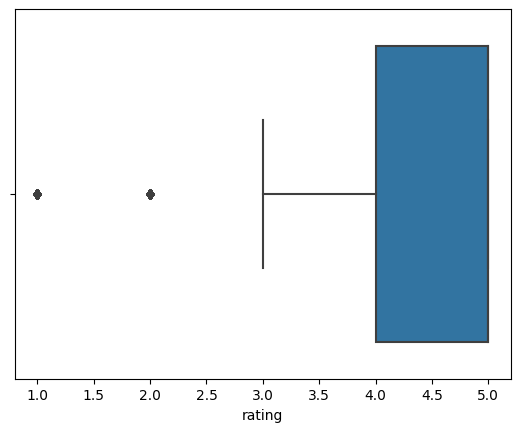

In [ ]:
# Outliers in 'rating'
sns.boxplot(x='rating', data = reviews_final)
plt.show()

In [ ]:
reviews_final.duplicated().sum()


0

## Tabla 'Estados'

In [ ]:
estados

array(['California', 'New York', 'Florida', 'Texas', 'Nevada'],
      dtype=object)

In [ ]:
df_estados = pd.DataFrame({'State': estados})
df_estados['State_id'] = range(1, len(estados) + 1)

In [ ]:
df_estados

,State,state_id
0,California,1
1,New York,2
2,Florida,3
3,Texas,4
4,Nevada,5


## Tabla 'Cliente'

In [ ]:
clientes = reviews_final['name'].unique()

In [ ]:
clientes.sum()

In [ ]:
df_clientes = reviews_final[['user_id', 'name']]
df_clientes = df_clientes.rename(columns={'user_id':'Client_id'})

## Tabla 'Review'

In [ ]:
df_review = reviews_final[['user_id', 'gmap_id', 'time', 'rating', 'text']]

df_review = df_review.rename(columns={'time':'date'})
df_review = df_review.rename(columns={'user_id':'Client_id'})

df_review['Review_id'] = range(1, len(df_review) + 1)

Data Incremental (Ejemplo):

*Contador para el siguiente ID
next_id = max(df['IDUsuario']) + 1

*Nuevos datos incrementales
new_data = [{'Nombre':'Laura', 'Edad':33}]
new_df = pd.DataFrame(new_data)

*Asignar nuevo ID incremental
new_df['IDUsuario'] = range(next_id, next_id+len(new_df))

*Actualizar contador
next_id = max(new_df['IDUsuario']) + 1

*Unir con datos existentes
df = pd.concat([df, new_df]).reset_index(drop=True)